In [1]:
import pandas as pd
import numpy as np
gc = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BA\Datasets\German_credit_classification.csv")

In [4]:
gc.iloc[:,7:].head(2)

,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [5]:
gc.liable.value_counts()

1    845
2    155
Name: liable, dtype: int64

In [8]:
#selected all continuous variables
gc1 = gc[["Default", "duration", "amount", "installment", "residence", "age", "cards" ]]
X = gc1.drop("Default", axis = 1)
y = gc1["Default"]

In [9]:
X.head(2)

,duration,amount,installment,residence,age,cards
0,6,1169,4,4,67,2
1,48,5951,2,2,22,1


In [10]:
y[:2]

0    0
1    1
Name: Default, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = .3, random_state = 2)

In [14]:
X_train.head(3)

,duration,amount,installment,residence,age,cards
90,12,618,4,4,56,1
305,6,1543,4,2,33,1
126,12,701,4,2,40,1


In [15]:
X_test.head(2)

,duration,amount,installment,residence,age,cards
37,18,2100,4,2,37,1
726,15,1316,2,2,47,2


In [16]:
y_train[:1], y_test[:1]

(90    0
 Name: Default, dtype: int64, 37    1
 Name: Default, dtype: int64)

In [32]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)
score = accuracy_score(y_test, knn.predict(X_test))
score

0.63

In [37]:
acc_score = []
for k in range (1,30, 2):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)#for parallel processing to find the distance bw the test instance and training instances
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    #score = f1_score(y_test, knn.predict(X_test))
    acc_score.append(score)
    
print(acc_score)

[0.63, 0.63, 0.6433333333333333, 0.6433333333333333, 0.6266666666666667, 0.6466666666666666, 0.6566666666666666, 0.6433333333333333, 0.64, 0.65, 0.6666666666666666, 0.6666666666666666, 0.6566666666666666, 0.6566666666666666, 0.6533333333333333]


In [38]:
dummy = pd.DataFrame({"k": range(1,30,2), "accuracy": acc_score})
dummy

,k,accuracy
0,1,0.630000
1,3,0.630000
2,5,0.643333
3,7,0.643333
4,9,0.626667
5,11,0.646667
6,13,0.656667
7,15,0.643333
8,17,0.640000
9,19,0.650000


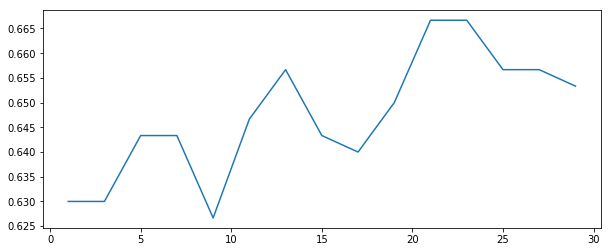

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(range(1,30,2), acc_score)
plt.show()

In [ ]:
#so we'll select k = 21 or k = 23

In [39]:
mod = KNeighborsClassifier(n_jobs=-1, n_neighbors=21,weights="distance")

In [41]:
mod.fit(X_train, y_train)
ypred = mod.predict(X_test)

In [42]:
accuracy_score(y_test, ypred)

0.63